In this tutorial, we would like to demonstrate some more advanced plotting features. First, we load all required modules and the test data. For details, see tutorial #1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(1, '../')

import seisplot

cmpgather = np.load("data/cmp.npy")

First, we create an image plot of the data, then we plot some data (in this case, the same data; in practice, this would most likely be different data; for instance, we could plot synthetic forward-modelled data on top of field data as a comparison, see fake example below) on top as wiggle plot. For the second *plot()* call, we re-use the existing `fig` and `ax` handles. Only the first call should draw labels etc.

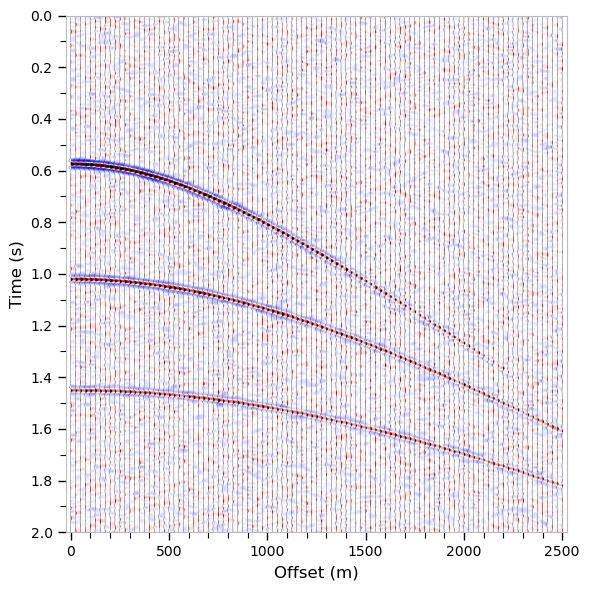

In [2]:
fig, ax = seisplot.plot(cmpgather, haxis="offset", width=6, height=6,
                        vlabel="Time (s)", hlabel="Offset (m)", 
                        vmajorticks=0.2, vminorticks=0.1, hminorticks=100)
_, _ = seisplot.plot(cmpgather, plottype="wiggle", fig=fig, ax=ax, haxis="offset")

Let's zoom in a little bit on the first 200 meters in offset and the time range 0.5 to 0.66 seconds. Just to demonstrate the feature, we rotate the horizontal tick values by 90 degrees.

We also add some text to the figure to "explain" the two different displays.

Text(144, 0.513, 'Field data in color\nSynth. data in b/w')

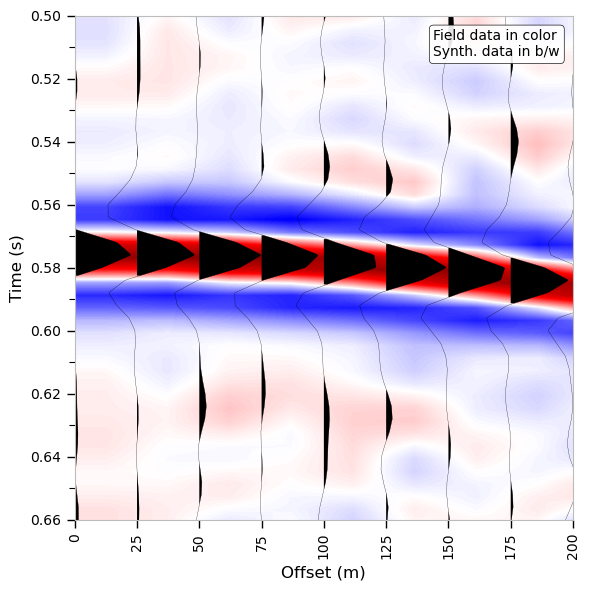

In [3]:
fig, ax = seisplot.plot(cmpgather, haxis="offset", width=6, height=6,
                        vlabel="Time (s)", hlabel="Offset (m)", 
                        vmajorticks=0.02, vminorticks=0.01, hmajorticks=25,
                        vaxisbeg=0.5, vaxisend=0.66, haxisend=200,
                        hticklabelrot=90)
seisplot.plot(cmpgather, plottype="wiggle", fig=fig, ax=ax, haxis="offset",
              vaxisbeg=0.5, vaxisend=0.66, haxisbeg=0, haxisend=200, wigglehires=True)
ax.text(144, 0.513, 'Field data in color\nSynth. data in b/w', 
        bbox={'facecolor': 'white', 'edgecolor': 'black', 'alpha': 0.9, 'boxstyle': 'round'})

In case you see a warning that "The figure layout has changed to tight plt.tight_layout()", this is a bug in certain Matplotlib versions which outputs the warning because the tight layout is requested by both *seisplot.plot()* calls on the same figure. It does not harm functionality, though.

Now let's try to create two wiggle plots in one figure. We make a copy of the original data and add some random numbers.

In [4]:
cmp1 = cmpgather[cmpgather["offset"] <= 200]
maxamp1 = np.fabs(cmp1["data"]).max()
cmp2 = cmp1.copy()
cmp2["data"] += 0.2*maxamp1*(2*np.random.random_sample(cmp2["data"].shape)-1)
maxamp2 = np.fabs(cmp2["data"]).max()

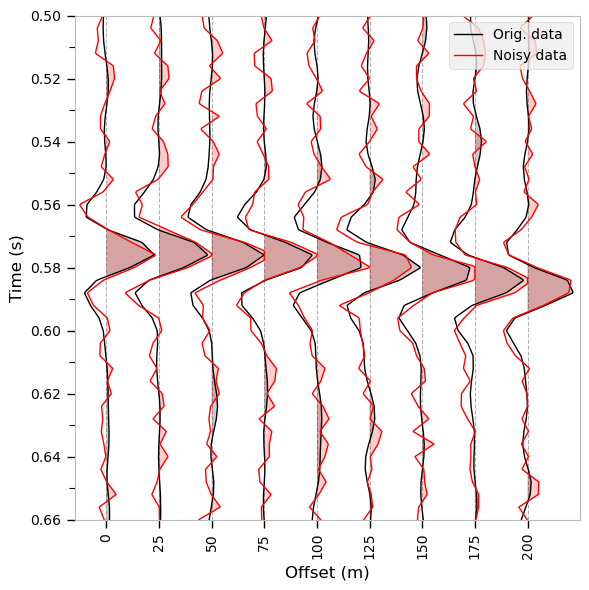

In [5]:
fig, ax = seisplot.plot(cmp1, plottype="wiggle", haxis="offset", width=6, height=6,
                        vlabel="Time (s)", hlabel="Offset (m)", label="Orig. data",
                        vmajorticks=0.02, vminorticks=0.01, hmajorticks=25, hticklabelrot=90, 
                        vaxisbeg=0.5, vaxisend=0.66, haxisbeg=-15, haxisend=224.9, 
                        wigglehires=True, alpha=0.2, fillcolor="black", linewidth=1)

ampratio = maxamp1 / maxamp2

seisplot.plot(cmp2, plottype="wiggle", fig=fig, ax=ax, haxis="offset",
              label="Noisy data", wigglehires=True, ampfac=ampratio,
              vaxisbeg=0.5, vaxisend=0.66, haxisbeg=-15, haxisend=224.9, 
              linecolor="red", alpha=0.2, fillcolor="red", linewidth=1,
              hgrid="major", gridstyle="--", gridlinealpha=0.3)
ax.legend(loc="upper right")